<a href="https://colab.research.google.com/github/hmulli2/Data-analysis-cyber-security/blob/main/Cyber_security_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv('Cyber Security Breaches.csv')
display(data.head())
data.iloc

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [2]:
display(data.loc[:, ['Name_of_Covered_Entity','Individuals_Affected']])

,Name_of_Covered_Entity,Individuals_Affected
0,Brooke Army Medical Center,1000
1,"Mid America Kidney Stone Association, LLC",1000
2,Alaska Department of Health and Social Services,501
3,Health Services for Children with Special Need...,3800
4,"L. Douglas Carlson, M.D.",5257
...,...,...
1050,Puerto Rico Health Insurance,28413
1051,"Hospitalists of Brandon, LLC",1831
1052,Santa Rosa Memorial Hospital,33702
1053,Group Health Plan of Hurley Medical Center,2289


In [27]:
#checking for null values
data.isna().sum()

Unnamed: 0                            0
Number                                0
Name_of_Covered_Entity                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Date_of_Breach                        0
Type_of_Breach                        0
Location_of_Breached_Information      0
Date_Posted_or_Updated                0
Summary                             913
breach_start                          0
breach_end                          910
year                                  0
dtype: int64

In [32]:
print(data['breach_start'].dtypes)

object


In [35]:
data['breach_start'] = pd.to_datetime(data['breach_start'])
print(data['breach_start'].dtypes)

datetime64[ns]


In [39]:
Summer = (data['breach_start'] > '06-21-2009') & (data['breach_start'] <= '10-22-2009').count()[0]
Summer

IndexError: ignored

In [8]:
data.State.value_counts()

CA    113
TX     83
FL     66
NY     58
IL     49
PA     40
IN     40
OH     33
TN     32
NC     32
MA     32
PR     31
GA     30
KY     26
MI     26
MO     25
WA     25
AZ     21
MN     21
NJ     20
CO     18
VA     18
MD     18
CT     17
OR     15
WI     14
SC     13
AL     12
AR     11
NM     10
NE      9
UT      9
DC      9
IA      8
LA      7
RI      7
KS      7
OK      6
WV      5
MS      5
NV      5
AK      5
WY      4
NH      4
MT      4
DE      3
ND      3
ID      2
HI      1
SD      1
ME      1
VT      1
Name: State, dtype: int64

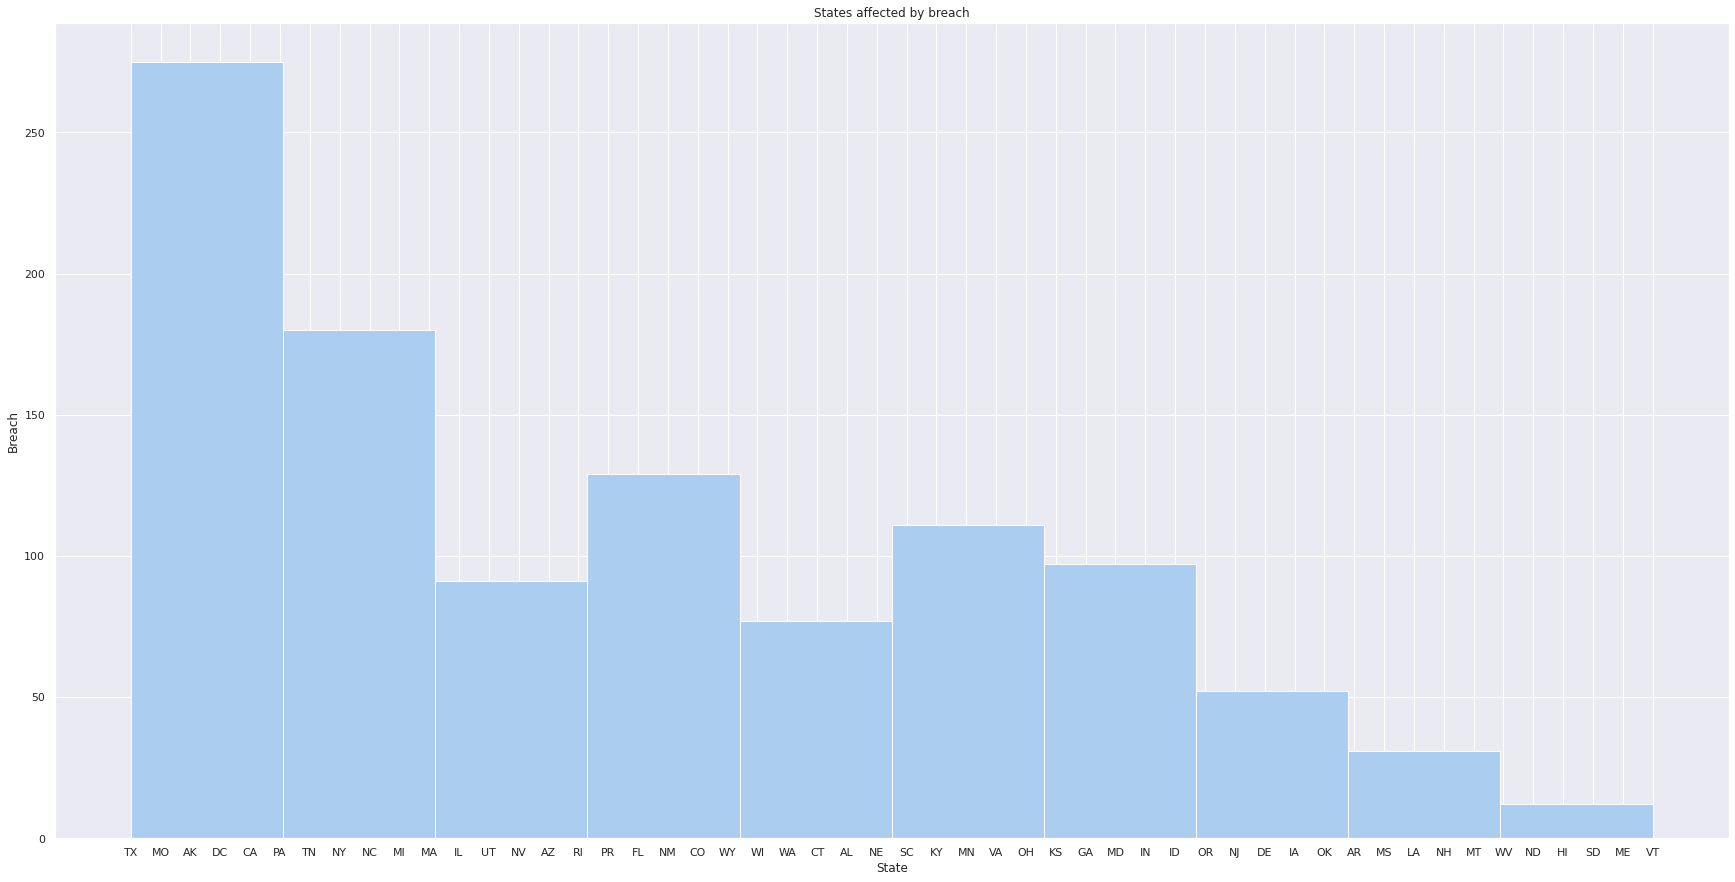

In [9]:
#States affected bar graph
#bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(30,15))

plt.hist(data.State, color='#abcdef')

#plt.xticks(bins)

plt.ylabel('Breach')
plt.xlabel('State')
plt.title('States affected by breach')

#plt.savefig('histogram.png', dpi=300)

plt.show()

In [18]:
#Types of Breach pie Chart
breachval = data.Type_of_Breach.value_counts()
breachval


Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Loss, Improper Disposal                                         3
Unknown, O

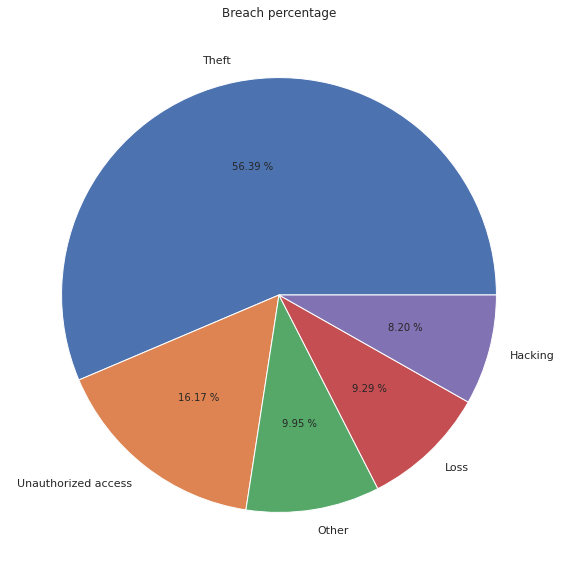

In [23]:
Theft = data.loc[data['Type_of_Breach'] == 'Theft'].count()[0]
Unauthorized_access = data.loc[data['Type_of_Breach'] == 'Unauthorized Access/Disclosure'].count()[0]
Other = data.loc[data['Type_of_Breach'] == 'Other'].count()[0]
Loss = data.loc[data['Type_of_Breach'] == 'Loss'].count()[0]
Hacking = data.loc[data['Type_of_Breach'] == 'Hacking/IT Incident'].count()[0]


plt.figure(figsize=(20,10))

labels = ['Theft', 'Unauthorized access', 'Other', 'Loss', 'Hacking']
#colors = ['#abcdef', '#aabbcc']

plt.pie([Theft, Unauthorized_access, Other, Loss, Hacking], labels = labels, autopct='%.2f %%')

plt.title('Breach percentage')

plt.show()

In [24]:
data.year.value_counts()

2013    254
2011    229
2012    227
2010    211
2009     56
2014     56
2008     13
2004      2
2005      2
1997      1
2003      1
2007      1
2006      1
2002      1
Name: year, dtype: int64

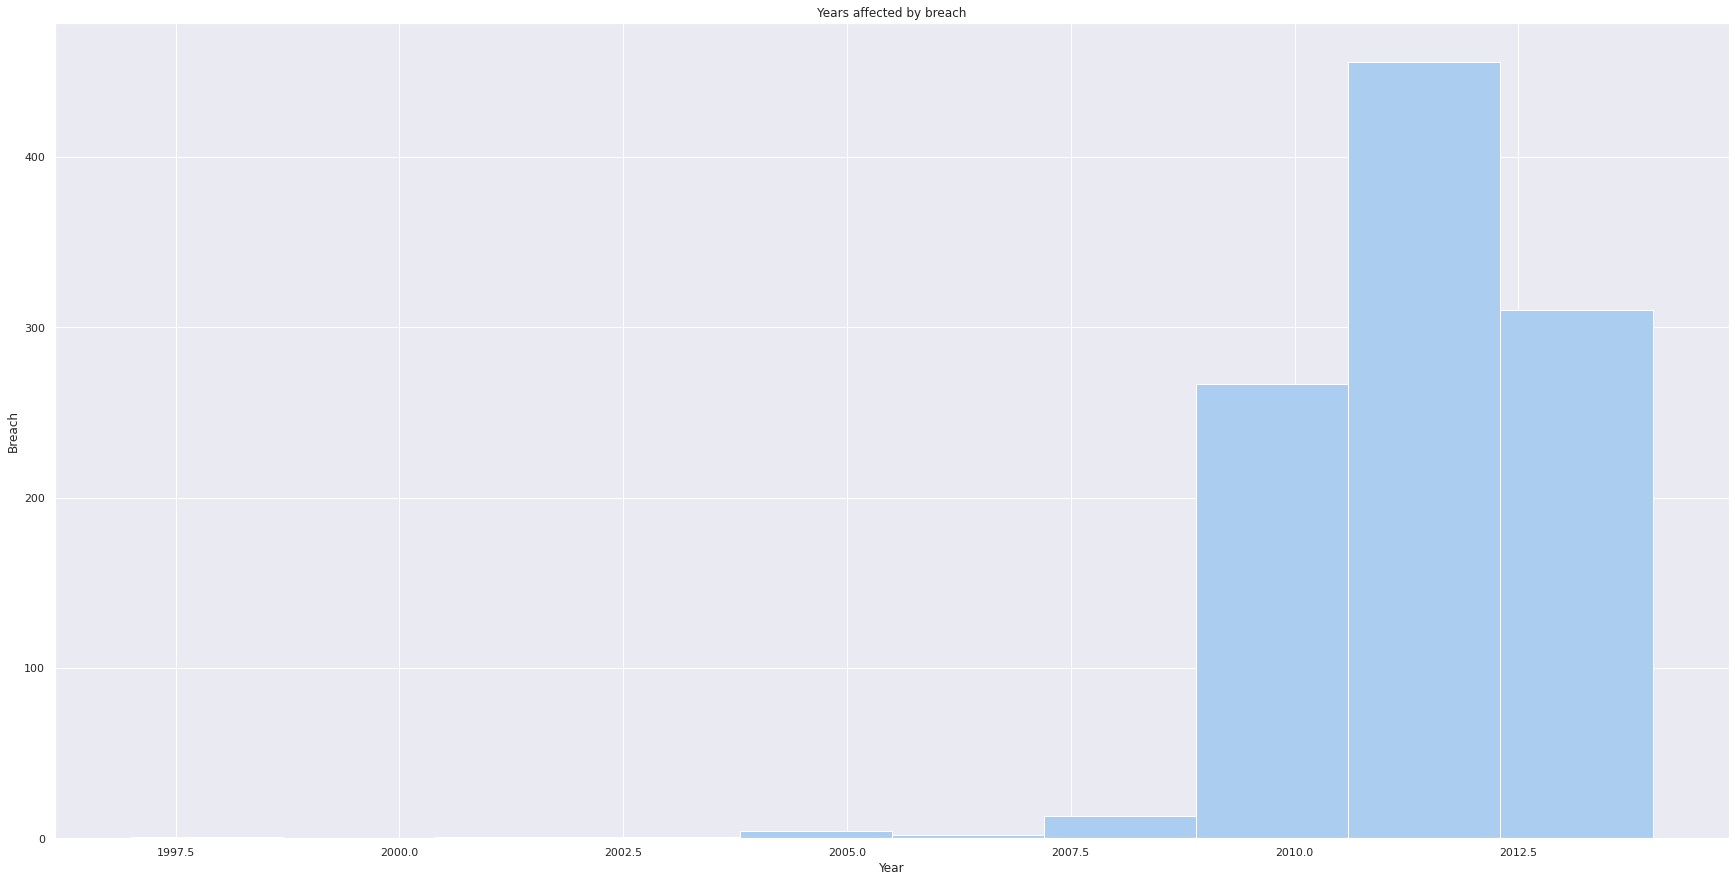

In [26]:
plt.figure(figsize=(30,15))

plt.hist(data.year, color='#abcdef')

#plt.xticks(bins)

plt.ylabel('Breach')
plt.xlabel('Year')
plt.title('Years affected by breach')

#plt.savefig('histogram.png', dpi=300)

plt.show()

In [ ]:
data.columns = ['Henry_column', 'Number', 'Name_of_Covered_Entity', 'State',
       'Business_Associate_Involved', 'Individuals_Affected', 'Date_of_Breach',
       'Type_of_Breach', 'Location_of_Breached_Information',
       'Date_Posted_or_Updated', 'Summary', 'breach_start', 'breach_end',
       'year']

data[:5]

,Henry_column,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [ ]:
col = len(data.columns)
col

14

In [ ]:
dd = data.describe() #Each col gives, count, mean ,sd, min, percentiles, max

In [ ]:
ddf = pd.DataFrame(dd)
ddf

,Henry_column,Number,Individuals_Affected,year
count,1055.0,1055.0,1.055e+03,1055.00
mean,528.0,527.0,3.026e+04,2011.45
...,...,...,...,...
75%,791.5,790.5,6.941e+03,2013.00
max,1055.0,1054.0,4.900e+06,2014.00


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('Cyber Security Breaches.csv')
# select numeric columns - numpy object
#numeric_inputs = df_employees.select_dtypes(include=np.number)
numeric_inputs = data.select_dtypes(include=np.number)

# check selected columns with the .columns attribute
numeric_inputs.columns

# Index(['salary'], dtype='object')
# the method returns a DataFrame object
print("the method returns a DataFrame object",type(numeric_inputs))

# <class 'pandas.core.frame.DataFrame'>
# select numeric columns - string
numeric_inputs_2 = data.select_dtypes(include='number')

# check selected columns with the .columns attribute
numeric_inputs_2.columns

# Index(['salary'], dtype='object')
# the method returns a DataFrame object
print(type(numeric_inputs_2))

# <class 'pandas.core.frame.DataFrame'>
# visualize the data frame
numeric_inputs

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Number,Individuals_Affected,year
0,1,0,1000,2009
1,2,1,1000,2009
2,3,2,501,2009
3,4,3,3800,2009
4,5,4,5257,2009
...,...,...,...,...
1050,1051,1050,28413,2013
1051,1052,1051,1831,2014
1052,1053,1052,33702,2014
1053,1054,1053,2289,2014


In [ ]:
data.dtypes #data types of each column

Unnamed: 0                           int64
Number                               int64
Name_of_Covered_Entity              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
breach_end                          object
year                                 int64
dtype: object

In [ ]:
dt = data.dtypes
print(type(dt))
print(dt.shape)
#print(dt)
print(dt == 'int64')

<class 'pandas.core.series.Series'>
(14,)
Unnamed: 0                           True
Number                               True
Name_of_Covered_Entity              False
State                               False
Business_Associate_Involved         False
Individuals_Affected                 True
Date_of_Breach                      False
Type_of_Breach                      False
Location_of_Breached_Information    False
Date_Posted_or_Updated              False
Summary                             False
breach_start                        False
breach_end                          False
year                                 True
dtype: bool


In [ ]:
data.describe()

,Unnamed: 0,Number,Individuals_Affected,year
count,1055.00000,1055.00000,1.055000e+03,1055.000000
mean,528.00000,527.00000,3.026202e+04,2011.450237
std,304.69657,304.69657,2.278598e+05,1.581780
min,1.00000,0.00000,5.000000e+02,1997.000000
25%,264.50000,263.50000,1.000000e+03,2010.000000
50%,528.00000,527.00000,2.300000e+03,2012.000000
75%,791.50000,790.50000,6.941000e+03,2013.000000
max,1055.00000,1054.00000,4.900000e+06,2014.000000


In [ ]:
data.Name_of_Covered_Entity.value_counts()

UnitedHealth Group health plan single affiliated covered entity    7
University of California, San Francisco                            4
Walgreen Co.                                                       4
Cook County Health & Hospitals System                              4
Triple-S Salud                                                     3
                                                                  ..
NYU Hospital for Joint Diseases Inventory Management Department    1
WAYNE HIGHLANDS SCHOOL DISTRICT                                    1
Summit Medical Group, PLLC                                         1
MAPFRE Life                                                        1
Abrham Tekola, M.D.,INC                                            1
Name: Name_of_Covered_Entity, Length: 967, dtype: int64

In [ ]:
data.drop(['Unnamed: 0', 'Number', 'Name_of_Covered_Entity','Business_Associate_Involved', 'Individuals_Affected', 'Date_of_Breach','Location_of_Breached_Information',
       'Date_Posted_or_Updated', 'Summary', 'breach_start', 'breach_end',
       'year'], axis = 1, inplace = True)

In [ ]:
data.head(10)

,State,Type_of_Breach
0,TX,Theft
1,MO,Theft
2,AK,Theft
3,DC,Loss
4,CA,Theft
5,CA,Theft
6,CA,Theft
7,CA,Theft
8,CA,Theft
9,CA,Theft


In [ ]:
data.Type_of_Breach.value_counts()

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Loss, Unauthorized Access/Disclosure                            5
Theft, Other                                                    5
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Loss, Improper Disposal                                         3
Unknown, O

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


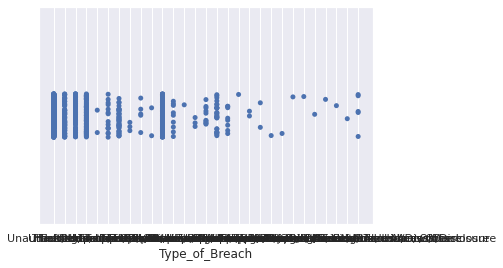

In [ ]:
sns.stripplot(data['Type_of_Breach'])

In [ ]:
# load an example dataset
#from vega_datasets import data
#cars = data.cars()
import pandas as pd
data = pd.read_csv('Cyber Security Breaches.csv')

# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(data).interactive()

SchemaValidationError: ignored

alt.Chart(...)

In [ ]:
data.cars(10)


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
